# Unsupervised learning

### AutoEncoders  

An autoencoder, is an artificial neural network used for learning efficient codings. 

The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. 

<img  src="imgs/autoencoder.png" width="60%"/>

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.

Autoencoders: 

1. data-specific (not good for generic data compression), 
2. lossy and 
3. _learned automatically from examples_ rather than engineered by a human.

Can be applied for:

- data generation,
- data denoising and 
- dimensionality reduction for data visualization (with appropriate dimensionality and sparsity constraints, can learn projections that are more interesting than PCA or other basic techniques).

In [ ]:
# based on: https://blog.keras.io/building-autoencoders-in-keras.html
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

encoding_dim = 32  
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
#note: x_train, x_train :) 
autoencoder.fit(x_train, x_train,
                nb_epoch=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.2709 - val_loss: 0.2617
Epoch 2/10
60000/60000 [==============================] - 7s - loss: 0.2520 - val_loss: 0.2390
Epoch 3/10
60000/60000 [==============================] - 7s - loss: 0.2297 - val_loss: 0.2184
Epoch 4/10
60000/60000 [==============================] - 7s - loss: 0.2124 - val_loss: 0.2040
Epoch 5/10
60000/60000 [==============================] - 7s - loss: 0.1999 - val_loss: 0.1931
Epoch 6/10
60000/60000 [==============================] - 7s - loss: 0.1902 - val_loss: 0.1846
Epoch 7/10
60000/60000 [==============================] - 7s - loss: 0.1823 - val_loss: 0.1774
Epoch 8/10
60000/60000 [==============================] - 7s - loss: 0.1758 - val_loss: 0.1714
Epoch 9/10
60000/60000 [==============================] - 7s - loss: 0.1703 - val_loss: 0.1663
Epoch 10/10
60000/60000 [==============================] - 7s - loss: 0.1655 - val_loss: 0.1619

#### Testing the Autoencoder 

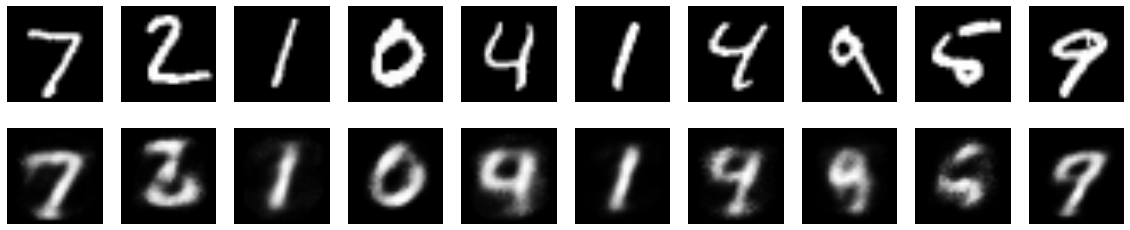

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.

### directions for improvements
- adding a sparsity constraint on the encoded representation;
- go deeper;
- convolutional autoencoder;


## 32-dimensional encoded representations

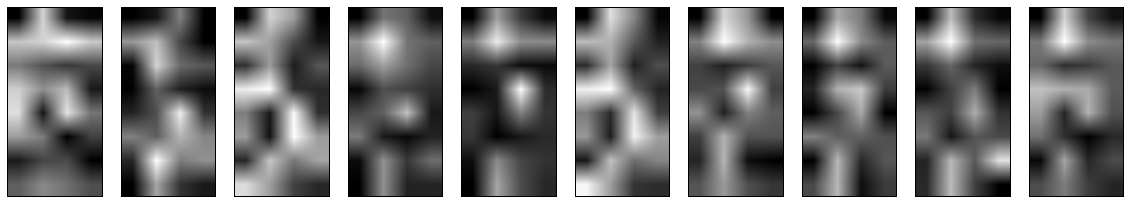

In [9]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Sample generation with Autoencoder 

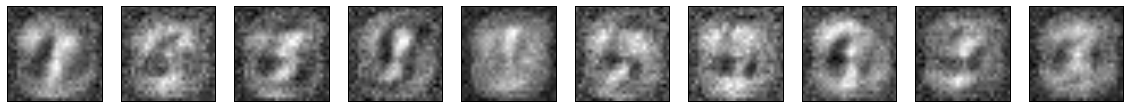

In [10]:
encoded_imgs = np.random.rand(10,32)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # generation
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

see more details at https://blog.keras.io/building-autoencoders-in-keras.html

---